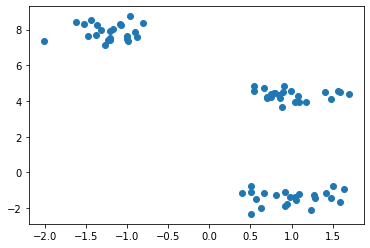

In [33]:
from sklearn.datasets import make_blobs
import numpy as np 

import matplotlib.pyplot as plt 
X, y = make_blobs(n_samples=70, centers=3, n_features=3,
                  random_state=0,cluster_std=0.4)

# X, y = make_blobs(n_samples =70, center=3, n_features=3 , random_state=0, cluster_std=0.4)

plt.scatter(X[:,0],X[:,1])
plt.show()

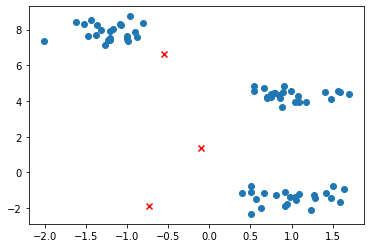

In [34]:
x1min = np.min(X[:,0])
x1max = np.max(X[:,0])
x2min = np.min(X[:,1])
x2max = np.max(X[:,1])

tmp_x1 = np.linspace(x1min, x1max, 100)
tmp_x2 = np.linspace(x2min, x2max, 100)

centers_x1 = np.random.choice(tmp_x1, 3)
centers_x2 = np.random.choice(tmp_x2, 3)

num_points = np.shape(X)[0]
num_clusters = 3
num_coordinates = 2


centers = np.vstack((centers_x1, centers_x2)).T

centers_old = centers+10

plt.scatter(X[:,0], X[:,1])
plt.scatter(centers[:,0], centers[:,1], marker = 'x', c = 'r')
plt.show()

centers_init = centers

In [35]:
epsilon = 0.1
center_shift = np.sum(np.sum((centers - centers_old)**2, axis = 1))
assignment = np.zeros((num_points, 1))
maxIter = 10
numIter = 0
while (center_shift > epsilon) and (numIter<maxIter):
    for i in range(num_points):
        distances_point2centers = np.zeros((num_clusters,1))
        for c in range(num_clusters):
            distances_point2centers[c] = np.sum((X[i,:] - centers[c,:])**2)
            
            
        assignment[i] = np.argmin(distances_point2centers)
        
    center_new = np.zeros((num_clusters,num_coordinates))
    for c in range(num_clusters):
        center_new[c,:] = np.mean(X[np.squeeze(np.where(np.squeeze(assignment==c))), :], axis=0)
    centers_old = centers
    centers = center_new
    center_shift = np.sum(np.sum((centers - centers_old)**2, axis = 1))
    numIter+=1


ValueError: operands could not be broadcast together with shapes (3,) (2,) 

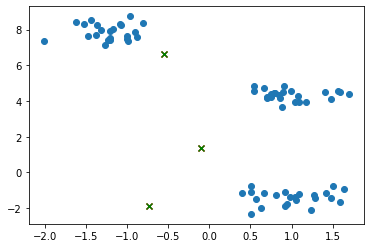

In [36]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(centers_init[:,0], centers_init[:,1], marker = 'x', c = 'r')
plt.scatter(centers[:,0], centers[:,1], marker = 'x', c = 'g')

plt.show()


In [39]:
epsilon = 0.1
center_shift = np.sum(np.sum((centers - centers_old)**2, axis = 1))
assignment = np.zeros((num_points, 1))
for i in range(num_points):
    distances_point2centers = np.zeros((num_clusters,1))
    for c in range(num_clusters):
        distances_point2centers[c] = np.sum((X[i,:] - centers[c,:])**2)
    assignment[i] = np.argmin(distances_point2centers)

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [ ]:
# shift+ tab 
# np.argmax
# np.meshgrid
